In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import zscore, probplot
import seaborn as sns

In [17]:

country_data = pd.read_excel('raw_data_countries/surface_areas.xlsx')
print(country_data)
df = pd.read_excel('output.xlsx')


                              Country  surface_area  \
0                              Brunei        5765.0   
1                             Czechia       78865.0   
2                             Senegal      196722.0   
3                             Andorra         468.0   
4                   Wallis and Futuna         142.0   
..                                ...           ...   
245                       Puerto Rico        8870.0   
246                         Australia     7692024.0   
247                        Kazakhstan     2724900.0   
248    British Indian Ocean Territory          60.0   
249  Saint Vincent and the Grenadines         389.0   

                              country  
0                              brunei  
1                             czechia  
2                             senegal  
3                             andorra  
4                   wallis and futuna  
..                                ...  
245                       puerto rico  
246                

In [18]:
merged_df = pd.merge(country_data, df, on='country')
merged_df.drop('Country', axis=1, inplace=True)

#without Germany
merged_df.drop(index=merged_df[merged_df['country'] == 'germany'].index, inplace=True)

merged_df["normalized_distance"] = merged_df['distance_to_wgm'] / merged_df['surface_area']
print(merged_df)


    surface_area     country                                       wgm  \
0      9706961.0       china   (32.00986623920785, 115.72989638324015)   
1      9706961.0       china   (32.00986623920785, 115.72989638324015)   
2      9706961.0       china   (32.00986623920785, 115.72989638324015)   
3      9706961.0       china   (32.00986623920785, 115.72989638324015)   
4      9706961.0       china   (32.00986623920785, 115.72989638324015)   
5       312679.0      poland   (51.64950457877499, 19.428714044082746)   
6       312679.0      poland   (51.64950457877499, 19.428714044082746)   
7      1141748.0    colombia   (5.004178779025576, -74.28357854314487)   
8      1141748.0    colombia   (5.004178779025576, -74.28357854314487)   
9     17098242.0      russia    (55.46136984433171, 43.53478976670728)   
10    17098242.0      russia    (55.46136984433171, 43.53478976670728)   
11    17098242.0      russia    (55.46136984433171, 43.53478976670728)   
12    17098242.0      russia    (55.46

In [19]:
#Scaling of values

minmaxscaler = MinMaxScaler()

minmaxscaler.fit(merged_df[['normalized_distance']])

merged_df['minmax_distance'] = minmaxscaler.transform(merged_df[['normalized_distance']])

standardscaler = StandardScaler()

standardscaler.fit(merged_df[['normalized_distance']])

merged_df['standard_scaled_distance'] = standardscaler.transform(merged_df[['normalized_distance']])

merged_df['standard_scaled_distance_zero_one'] = (merged_df['standard_scaled_distance']+1) /2
 

print(merged_df)

    surface_area     country                                       wgm  \
0      9706961.0       china   (32.00986623920785, 115.72989638324015)   
1      9706961.0       china   (32.00986623920785, 115.72989638324015)   
2      9706961.0       china   (32.00986623920785, 115.72989638324015)   
3      9706961.0       china   (32.00986623920785, 115.72989638324015)   
4      9706961.0       china   (32.00986623920785, 115.72989638324015)   
5       312679.0      poland   (51.64950457877499, 19.428714044082746)   
6       312679.0      poland   (51.64950457877499, 19.428714044082746)   
7      1141748.0    colombia   (5.004178779025576, -74.28357854314487)   
8      1141748.0    colombia   (5.004178779025576, -74.28357854314487)   
9     17098242.0      russia    (55.46136984433171, 43.53478976670728)   
10    17098242.0      russia    (55.46136984433171, 43.53478976670728)   
11    17098242.0      russia    (55.46136984433171, 43.53478976670728)   
12    17098242.0      russia    (55.46

In [20]:
merged_df.to_excel('final.xlsx', index=False)

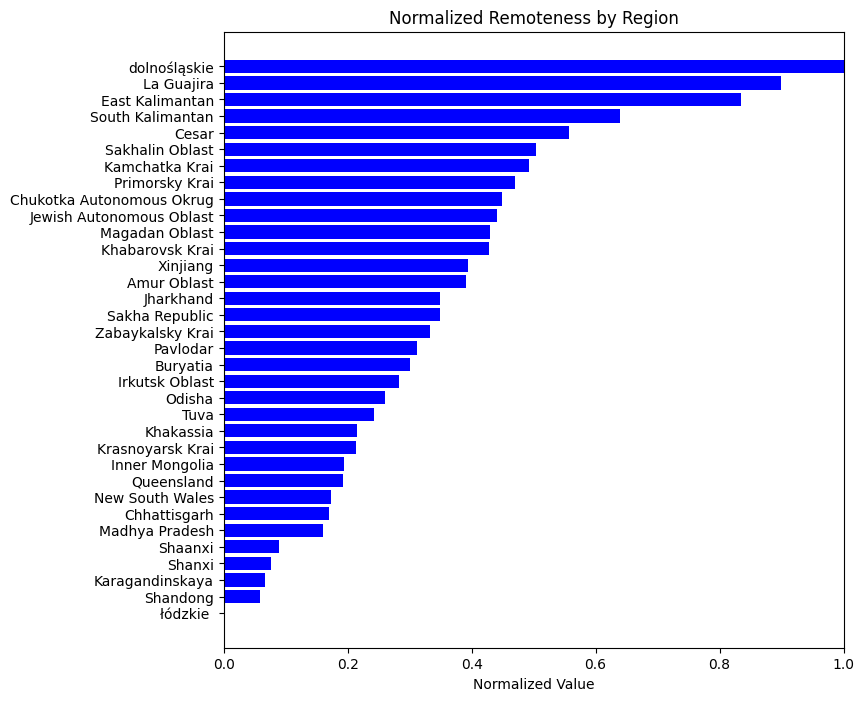

In [34]:
# Sort the DataFrame by values
metric = 'minmax_distance'
data = merged_df.sort_values(by=metric)

# Set the chart size
fig, ax = plt.subplots(figsize=(8, 8))

# Plot a horizontal bar chart
ax.barh(data['region'], data[metric], color='blue')

# Set the x-axis limits
ax.set_xlim([0, 1])

# Set the x-axis label
ax.set_xlabel('Normalized Value')

# Set the chart title
ax.set_title('Normalized Remoteness by Region')

# Show the chart
plt.show()

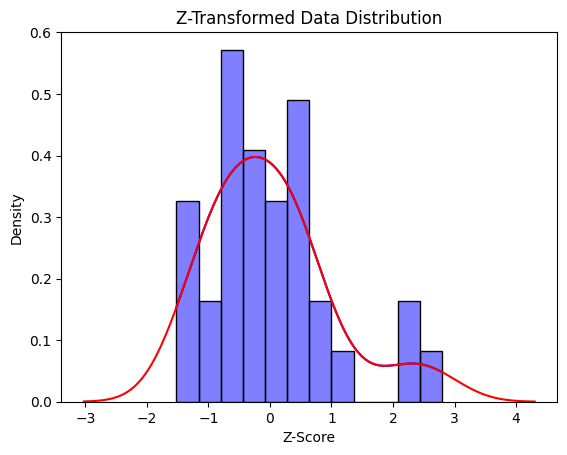

In [32]:
# Compute the z-scores
metric = 'standard_scaled_distance'
zdata = merged_df[metric]

# Plot a histogram with a normal distribution curve
sns.histplot(zdata, kde=True, stat='density', color='blue', bins=12)
sns.kdeplot(zdata, color='red')

# Set the chart title and x-axis label
plt.title('Z-Transformed Data Distribution')
plt.xlabel('Z-Score')

# Show the chart
plt.show()

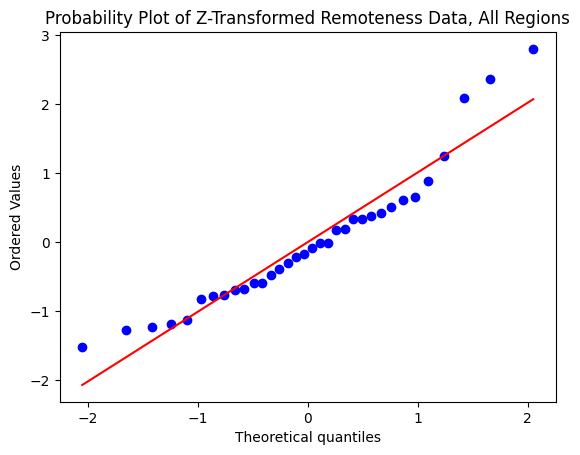

In [33]:
# Create a probability plot
probplot(zdata, plot=plt)

# Set the chart title
plt.title('Probability Plot of Z-Transformed Remoteness Data, All Regions')

# Show the chart
plt.show()